In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Imports
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from evoltree import evoltree
import matplotlib.pyplot as plt

# Create two evoltree objects, one for each variant
edt = evoltree()
edtl = evoltree()
# Load dataset
X, y, X_val, y_val, X_ts, y_ts = edt.load_offline_data()


In [3]:
# Fit both versions on train data
## Normal variant:
edt.fit(
    X,
    y,
    "Sale",
    X_val,
    y_val,
    pop=100,
    gen=10,
    lamarck=False,
    experiment_name="test",
)
y_pred1 = edt.predict(X_ts, mode="best")

100%|██████████| 10/10 [01:55<00:00, 11.55s/it]


In [4]:
## Lamarckian variant, doesn't need as much iterations (gen)
edtl.fit(
    X,
    y,
    "Sale",
    X_val,
    y_val,
    pop=100,
    gen=5,
    lamarck=True,
    experiment_name="testLamarck",
)
# Predict on test data, using the solution with better predictive performance on validation data
y_predL1 = edtl.predict(X_ts, mode="best")

100%|██████████| 5/5 [01:11<00:00, 14.40s/it]


In [5]:
# Fit a traditional Decision Tree for comparison
dt = DecisionTreeClassifier(random_state=1234).fit(X, y)
prob = dt.predict_proba(X_ts)

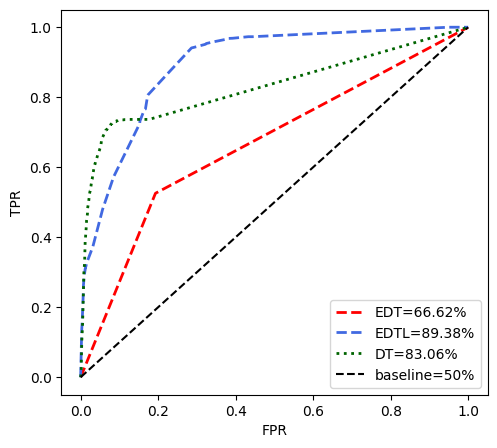

<Figure size 640x480 with 0 Axes>

In [6]:
%matplotlib inline
# Compute AUC on test data
fpr, tpr, th = metrics.roc_curve(y_ts, y_pred1, pos_label="Sale")
fprL1, tprL1, thL1 = metrics.roc_curve(y_ts, y_predL1, pos_label="Sale")
fprdt, tprdt, thdt = metrics.roc_curve(y_ts, prob[:, 1], pos_label="Sale")
auc1 = metrics.auc(fpr, tpr)
aucL1 = metrics.auc(fprL1, tprL1)
aucdt = metrics.auc(fprdt, tprdt)
# Plot results
plt.rcParams["font.family"] = "sans-serif"
fig, ax = plt.subplots(1, 1, figsize=(5.5, 5))
#"""
plt.plot(
    fpr,
    tpr,
    color="red",
    ls="--",
    lw=2,
    label="EDT={}%".format(round(auc1 * 100, 2)),
)
#"""
plt.plot(
    fprL1,
    tprL1,
    color="royalblue",
    ls="--",
    lw=2,
    label="EDTL={}%".format(round(aucL1 * 100, 2)),
)
plt.plot(
    fprdt,
    tprdt,
    color="darkgreen",
    ls=":",
    lw=2,
    label="DT={}%".format(round(aucdt * 100, 2)),
)
plt.plot([0, 1], [0, 1], color="black", ls="--", label="baseline=50%")
plt.legend(loc=4)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()
plt.savefig("results.png")